In [2]:
import os
import sys
import pandas as pd
import numpy as np
import xarray as xr
import xgcm
from xgcm import Grid
import xmitgcm
from xmitgcm import open_mdsdataset
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import warnings 
warnings.filterwarnings('ignore')
import ffmpeg
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.ticker as mticker

In [3]:
data_dir = '/work/uo0122/u301673/MITgcm_thesis/verification/g4/run_final'  

In [4]:
ADJqnet=open_mdsdataset(data_dir,prefix= ['ADJqnet'],ignore_unknown_vars=True)
ADJtaux=open_mdsdataset(data_dir,prefix= ['ADJtaux'],ignore_unknown_vars=True)
ADJtauy=open_mdsdataset(data_dir,prefix= ['ADJtauy'],ignore_unknown_vars=True)
ADJempr=open_mdsdataset(data_dir,prefix= ['ADJempr'],ignore_unknown_vars=True)
#ADJuvel=open_mdsdataset(data_dir,prefix= ['ADJuvel'],ignore_unknown_vars=True)
#ADJvvel=open_mdsdataset(data_dir,prefix= ['ADJvvel'],ignore_unknown_vars=True)
#ADJtheta=open_mdsdataset(data_dir,prefix= ['ADJtheta'],ignore_unknown_vars=True)
#ADJsalt=open_mdsdataset(data_dir,prefix= ['ADJsalt'],ignore_unknown_vars=True)
#ADJetan=open_mdsdataset(data_dir,prefix= ['ADJetan'],ignore_unknown_vars=True)
ds=xr.merge([ADJtaux,ADJtauy,ADJqnet,ADJempr])

In [5]:
grid = xgcm.Grid(ds, periodic=['X', 'Y'])

# ADJ wind

Text(0.5, 1.0, '$m/(Nm^{-2})$')

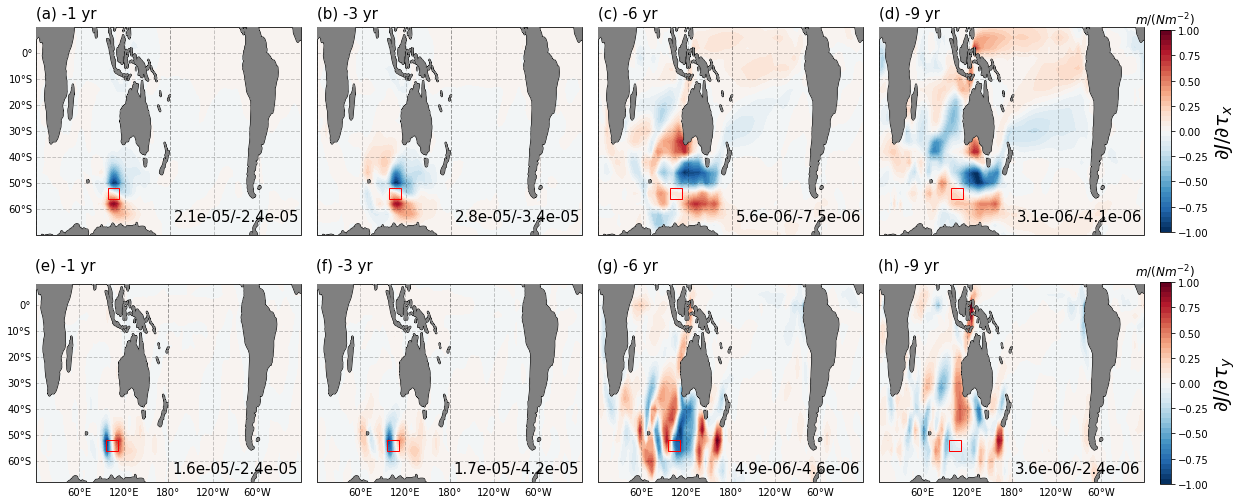

In [5]:
f, axes = plt.subplots(2, 4, figsize=(16, 7),constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 3.5})#, constrained_layout=True#, gridspec_kw = {'wspace':0.2, 'hspace':0.007}
taux_lag0 = ds.ADJtaux[-12,:,:].sel(YC=slice(-70,10))#/ds.rAw  # YC XG
taux_lag1=ds.ADJtaux[-36,:,:].sel(YC=slice(-70,10))#/ds.rAw
taux_lag2=ds.ADJtaux[-72,:,:].sel(YC=slice(-70,10))#/ds.rAw
taux_lag3=ds.ADJtaux[-108,:,:].sel(YC=slice(-70,10))#/ds.rAw

tauy_lag0 = ds.ADJtauy[-12,:,:].sel(YG=slice(-70,10))#/ds.rAs
tauy_lag1=ds.ADJtauy[-36,:,:].sel(YG=slice(-70,10))#/ds.rAs
tauy_lag2=ds.ADJtauy[-72,:,:].sel(YG=slice(-70,10))#/ds.rAs
tauy_lag3=ds.ADJtauy[-108,:,:].sel(YG=slice(-70,10))#/ds.rAs

data=[taux_lag0,taux_lag1,taux_lag2,taux_lag3,
      tauy_lag0,tauy_lag1,tauy_lag2,tauy_lag3]

labels = ["(a) -1 yr ", "(b) -3 yr ", "(c) -6 yr ","(d) -9 yr",
         "(e) -1 yr ", "(f) -3 yr ", "(g) -6 yr", "(h) -9 yr"]

for i, (img, ax, label) in enumerate(zip(data,axes.flatten(),labels)):
    cs=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False,cmap=plt.cm.RdBu_r,
                #vmin=-4e-6,vmax=4e-6,
                extend='neither',robust=False)
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.text(-180, 18, label, fontsize=15, va='top',ma='left')
    ax.text(5, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    #gl.ylocator = mticker.FixedLocator(np.arange(-80,80,10))
    #gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
    if i>3:
        gl.bottom_labels = True
    if i == 0 or i == 4:
        gl.left_labels = True

cbar_ax1 = f.add_axes([1.003, 0.55, 0.01, 0.4])
cbar_ax2 = f.add_axes([1.003, 0.05, 0.01, 0.4])
# Draw the colorbar
cbar1=f.colorbar(cs, cax=cbar_ax1,orientation='vertical',extend='neither')
cbar2=f.colorbar(cs, cax=cbar_ax2,orientation='vertical',extend='neither')
cbar1.set_label(label=r"$\partial {J}/ \partial{\tau}_x$",size=20, weight='bold')
cbar2.set_label(label=r"$\partial {J}/ \partial{\tau}_y$",size=20, weight='bold')
cbar1.ax.tick_params(axis="both")
cbar2.ax.tick_params(axis="both")
cbar_ax2.set_title(r'$m/(Nm^{-2})$')
cbar_ax1.set_title(r'$m/(Nm^{-2})$')
#plt.savefig('Results_snap/ADJtau.png', bbox_inches='tight')

In [6]:
#ds['YG']=ds.YG-2

Text(0.5, 1.0, '$m/(Nm^{-3})$')

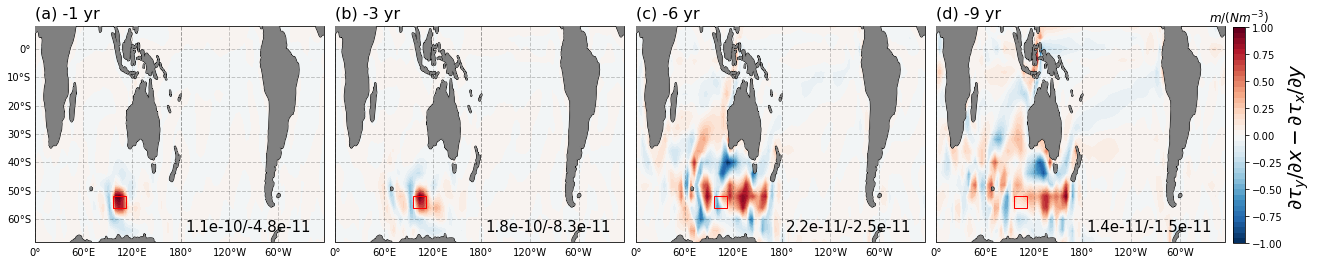

In [7]:
def curl(zon,mer):
    curl= (-grid.diff(zon * ds.dxC, 'Y') + grid.diff(mer * ds.dyC, 'X'))/ds.rAz
    return curl
taux_lag0 = ds.ADJtaux[-12,:,:]#/ds.rAw  # YC XG
taux_lag1=ds.ADJtaux[-36,:,:]#/ds.rAw
taux_lag2=ds.ADJtaux[-72,:,:]#/ds.rAw
taux_lag3=ds.ADJtaux[-108,:,:]

tauy_lag0 = ds.ADJtauy[-12,:,:]#/ds.rAs
tauy_lag1=ds.ADJtauy[-36,:,:]#/ds.rAs
tauy_lag2=ds.ADJtauy[-72,:,:]#/ds.rAs
tauy_lag3=ds.ADJtauy[-108,:,:]

data=[curl(taux_lag0, tauy_lag0).sel(YG=slice(-71,10)),curl(taux_lag1, tauy_lag1).sel(YG=slice(-71,10)),curl(taux_lag2, tauy_lag2).sel(YG=slice(-71,10)),curl(taux_lag3, tauy_lag3).sel(YG=slice(-71,10))]

f, axes = plt.subplots(1, 4, figsize=(17, 4),constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 3.5})#, constrained_layout=True#, gridspec_kw = {'wspace':0.2, 'hspace':0.007}
labels = ["(a) -1 yr ", "(b) -3 yr ", "(c) -6 yr ","(d) -9 yr"]
for idx, (img, ax,label) in enumerate(zip(data, axes.flatten(),labels)):
    cs=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=True,cmap=plt.cm.RdBu_r)
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='r', alpha=1))
    ax.text(-180, 15, label, fontsize=16, va='top',ma='left')
    ax.text(5, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.ylocator = mticker.FixedLocator(np.arange(-80,80,10))
    gl.bottom_labels = True
    if idx == 0:
        gl.left_labels = True
#axes[0].text(-230, -15,'Wind stress curl', fontsize=14, va='top',rotation=90,weight='bold')         
cbar_ax1 = f.add_axes([1.004, 0.12, 0.01, 0.75])
cbar1=f.colorbar(cs, cax=cbar_ax1,orientation='vertical',extend='neither')
cbar1.set_label(label=r'$\partial{\tau_y}/ \partial{x} - \partial{\tau_x}/ \partial{y}$',size=20, weight='bold')
cbar1.ax.tick_params(axis="both")
cbar_ax1.set_title(r'$m/(Nm^{-3})$')
#plt.suptitle('3-year mean sensitivity to the surface wind stress curl', fontsize=18)
#plt.savefig('Results_snap/ADJcurl.png', bbox_inches='tight')

In [8]:
#def curl(zon,mer):
#    curl= (-grid.diff(zon * ds.dxC, 'Y') + grid.diff(mer * ds.dyC, 'X'))
#    return curl

In [9]:
#omega = 7.29e-5
#R = 6.3781e6
#f = 2 * omega * np.sin(np.deg2rad(ds.YG))
#beta = 2 * omega / R * np.cos(np.deg2rad(ds.YG))
#rho0 = 1030
#ds['V_sv'] = ds.scow_wind_stress_curl / (beta * rho0 * 1e7)

# ADJ bouyancy

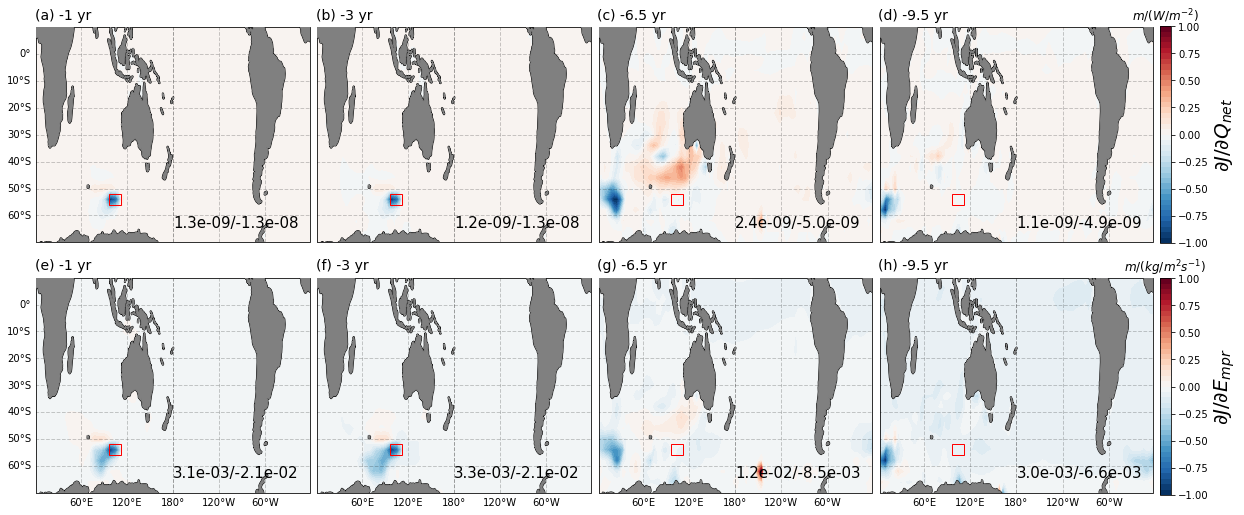

In [43]:
f, axes = plt.subplots(2, 4, figsize=(16, 7),sharey=True,sharex=True, constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 3.5})#, constrained_layout=True#, gridspec_kw = {'wspace':0.2, 'hspace':0.007}

qnet_lag0 = ds.ADJqnet[-12,:,:]
qnet_lag1=ds.ADJqnet[-36,:,:]
qnet_lag2=ds.ADJqnet[-78,:,:]
qnet_lag3=ds.ADJqnet[-110,:,:]

empr_lag0 = ds.ADJempr[-12,:,:]
empr_lag1=ds.ADJempr[-36,:,:]
empr_lag2=ds.ADJempr[-78,:,:]
empr_lag3=ds.ADJempr[-110,:,:]

data1=[qnet_lag0.sel(YC=slice(-70,10)),qnet_lag1.sel(YC=slice(-70,10)),qnet_lag2.sel(YC=slice(-70,10)),qnet_lag3.sel(YC=slice(-70,10))]
data2=[empr_lag0.sel(YC=slice(-70,10)),empr_lag1.sel(YC=slice(-70,10)),empr_lag2.sel(YC=slice(-70,10)),empr_lag3.sel(YC=slice(-70,10))]

labels1 = ["(a) -1 yr ", "(b) -3 yr ", "(c) -6.5 yr ","(d) -9.5 yr"]
labels2 =  ["(e) -1 yr ", "(f) -3 yr ", "(g) -6.5 yr", "(h) -9.5 yr"]
for i, (img, ax,label) in enumerate(zip(data1,axes.flatten()[0:4],labels1)):
    cs1=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), add_colorbar=False, cmap=plt.cm.RdBu_r)#vmin=-1e-9,vmax=1e-9,
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.text(-180, 17, label, fontsize=14, va='top',ma='left') 
    ax.text(0, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')

    ax.set_title('')
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    #gl.ylocator = mticker.FixedLocator(np.arange(-80,80,10))
    #gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
    if i == 0:
        gl.left_labels = True
        
for i, (img, ax,label) in enumerate(zip(data2,axes.flatten()[4:],labels2)):
    cs2=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), 
                 add_colorbar=False, cmap=plt.cm.RdBu_r,robust=False)#vmin=-0.004,vmax=0.004
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.text(-180, 17, label, fontsize=14, va='top',ma='left')
    ax.text(0, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    ax.set_title('')
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if i == 0:
        gl.left_labels = True
cbar_ax1 = f.add_axes([1.003, 0.53, 0.01, 0.43])
cbar_ax2 = f.add_axes([1.003, 0.03, 0.01, 0.43])
 #Draw the colorbar
cbar1=f.colorbar(cs1, cax=cbar_ax1,orientation='vertical',extend='neither')
cbar2=f.colorbar(cs2, cax=cbar_ax2,orientation='vertical',extend='neither')
cbar1.set_label(label=r'$\partial {J}/ \partial{Q_{net}}$',size=20, weight='bold')
cbar2.set_label(label=r'$\partial {J}/ \partial{E_{mpr}}$',size=20, weight='bold')
cbar1.ax.tick_params(axis="both")
cbar2.ax.tick_params(axis="both")
cbar_ax1.set_title(r'$m/(W/m^{-2})$')
cbar_ax2.set_title(r'$m/(kg/m^2s^{-1})$')

#axes[0,0].text(-230, -25,'Heat flux', fontsize=14, va='top',rotation=90,weight='bold') 
#axes[1,0].text(-230, -15,'Fresh water flux', fontsize=14, va='top',rotation=90,weight='bold')
#plt.suptitle('3-year mean sensitivity to the net surface heat flux and fresh water flux', fontsize=18)
#plt.savefig('Results_snap/ADJbuoy.png', bbox_inches='tight')

# scaled sensitivity

In [23]:
from scipy import signal
def filt_lowpass(data_, sample_freq, cutoff, order, ax_n, detrend=False,
                 standard=False):
    if detrend: #detrend the data first
        data_ = (data_ * 0) + signal.detrend(data=data_.fillna(0), axis=ax_n)
    b, a = signal.butter(order, cutoff, btype='lowpass') #low pass filter
    #apply the filter forward and backward along a given axis
    filtered = signal.filtfilt(b, a, data_, axis=ax_n) 
    filtered_xr = (data_ * 0) + filtered
    if standard: #standardize the data
        filtered_xr = filtered_xr.std('time')
    return(filtered_xr)

In [51]:
hist_varnmall = ['tauu','tauv','hfl', 'sfl'] 
forc_dir='/work/uo0122/u301673/MITgcm_thesis/verification/Armin_90x40x15/input_exf/'
for i,varnm in enumerate(hist_varnmall):
    filein=forc_dir+'hist_2d0001_4x4_'+varnm+'.bin'
    raw = np.fromfile(filein, dtype='>f')
    hist_varnmall[i]=np.reshape(raw, (1872,40,90))[-240:,:,:] 

In [52]:
varnmall = ['tauu','tauv','hfl', 'sfl'] 
forc_dir='/work/uo0122/u301673/MITgcm_thesis/verification/Armin_90x40x15/input_exf/'
for i,varnm in enumerate(varnmall):
    filein=forc_dir+'rcp85_2d0001_4x4_'+varnm+'.bin'
    raw = np.fromfile(filein, dtype='>f')
    varnmall[i]=np.reshape(raw, (1128,40,90))[-240:,:,:] 

In [53]:
time = pd.date_range("2000-01-15", periods=240, freq='M')
hist_taux = xr.DataArray(data=hist_varnmall[0],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
hist_tauv = xr.DataArray(data=hist_varnmall[1],dims=[ "time","YC","XC"],coords=dict(YC=ds.YC.values,XC=ds.XC.values,time=time))
hist_hfl = xr.DataArray(data=hist_varnmall[2],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
hist_sfl = xr.DataArray(data=hist_varnmall[3],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))*1000

In [54]:
time = pd.date_range("2000-01-15", periods=240, freq='M')
taux = xr.DataArray(data=varnmall[0],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
tauv = xr.DataArray(data=varnmall[1],dims=[ "time","YC","XC"],coords=dict(YC=ds.YC.values,XC=ds.XC.values,time=time))
hfl = xr.DataArray(data=varnmall[2],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
sfl = xr.DataArray(data=varnmall[3],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))*1000

In [55]:
hist_taux_std=filt_lowpass(hist_taux, 1, 1/18, 5, 0, detrend=True, standard=True)
hist_tauv_std=filt_lowpass(hist_tauv, 1, 1/18, 5, 0, detrend=True, standard=True)
hist_hfl_std=filt_lowpass(hist_hfl, 1, 1/18, 5, 0, detrend=True, standard=True)
hist_sfl_std=filt_lowpass(hist_sfl, 1, 1/18, 5, 0, detrend=True, standard=True)

In [56]:
taux_std=filt_lowpass(taux, 1, 1/18, 5, 0, detrend=True, standard=True)
tauy_std=filt_lowpass(tauv, 1, 1/18, 5, 0, detrend=True, standard=True)
qnet_std=filt_lowpass(hfl, 1, 1/18, 5, 0, detrend=True, standard=True)
empr_std=filt_lowpass(sfl, 1, 1/18, 5, 0, detrend=True, standard=True)

In [57]:
taux_std = taux_std-hist_taux_std
tauy_std = tauy_std-hist_tauv_std
qnet_std = qnet_std-hist_hfl_std
empr_std =empr_std-hist_sfl_std

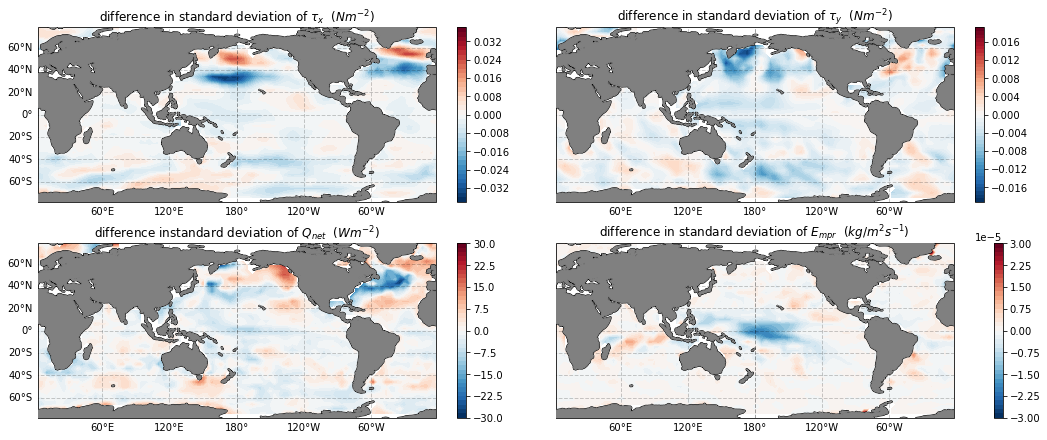

In [59]:
f, axes = plt.subplots(2, 2, figsize=(14.5,6),sharey=True, sharex=True,constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180),"aspect": 1})
for (img, ax) in zip([taux_std,tauy_std,qnet_std,empr_std],axes.flatten()):
    img.where(ds.hFacC[0]).plot.contourf(ax=ax,levels=50,cmap=plt.cm.RdBu_r,
                                                       transform=ccrs.PlateCarree(),add_colorbar=True, add_labels=False,cbar_kwargs=dict(orientation='vertical'))
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if ax == axes[0,0] or ax == axes[1,0]:
        gl.left_labels = True
        
axes[0, 0].set_title('difference in standard deviation of $\\tau_x $  $(N m^{-2})$')
axes[0, 1].set_title('difference in standard deviation of $\\tau_y$  $(N m^{-2})$')
axes[1, 0].set_title('difference instandard deviation of $Q_{net}$  $(W m^{-2})$')
axes[1, 1].set_title('difference in standard deviation of $E_{mpr}$  $(kg/m^2s^{-1})$')
#plt.savefig('Results_snap/std_diff.png', bbox_inches='tight')

Text(0.5, 1.0, 'surface freshwater flux  $E_{mpr}$  $(kg/m^2s^{-1})$')

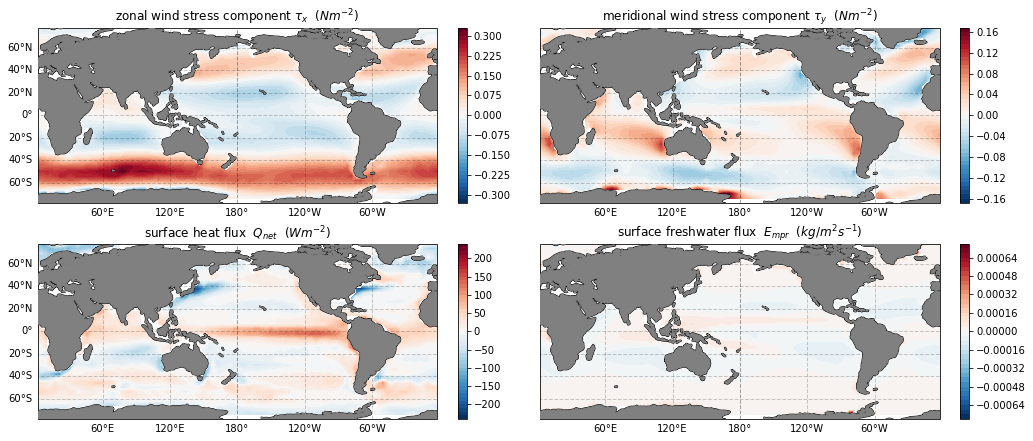

In [18]:
f, axes = plt.subplots(2, 2, figsize=(14.5,6),sharey=True, sharex=True,constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180),"aspect": 1})
for (img, ax) in zip([taux,tauv,hfl,sfl],axes.flatten()):
    img.mean(dim='time').where(ds.hFacC[0]).plot.contourf(
        ax=ax,levels=50,transform=ccrs.PlateCarree(),add_colorbar=True, 
        add_labels=False,cbar_kwargs=dict(orientation='vertical'))
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if ax == axes[0,0] or ax == axes[1,0]:
        gl.left_labels = True
    
axes[0, 0].set_title('zonal wind stress component $\\tau_x $  $(N m^{-2})$')
axes[0, 1].set_title('meridional wind stress component $\\tau_y$  $(N m^{-2})$')
axes[1, 0].set_title('surface heat flux  $Q_{net}$  $(W m^{-2})$')
axes[1, 1].set_title('surface freshwater flux  $E_{mpr}$  $(kg/m^2s^{-1})$')

#plt.suptitle("surface forcings in RCP 8.5 scenario averaged over the last 50 years", fontsize=14)
#plt.savefig('Results_snap/RCP_forcing.png', bbox_inches='tight')

In [16]:
#save as netcdf
#qnet = hfl.to_dataset(name="qnet")
#encoding = {"qnet": {'zlib': True}}
#qnet.to_netcdf("qnet.nc", encoding=encoding)

In [61]:
varnmall = ['tauu','tauv','hfl', 'sfl'] 
forc_dir='/work/uo0122/u301673/MITgcm_thesis/verification/Armin_90x40x15/input_exf/'
for i,varnm in enumerate(varnmall):
    filein=forc_dir+'rcp85_2d0001_4x4_'+varnm+'.bin'
    raw = np.fromfile(filein, dtype='>f')
    varnmall[i]=np.reshape(raw, (1128,40,90))[-600:,:,:] 
    
time = pd.date_range("2000-01-15", periods=600, freq='M')
taux = xr.DataArray(data=varnmall[0],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
tauv = xr.DataArray(data=varnmall[1],dims=[ "time","YC","XC"],coords=dict(YC=ds.YC.values,XC=ds.XC.values,time=time))
hfl = xr.DataArray(data=varnmall[2],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
sfl = xr.DataArray(data=varnmall[3],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))*1000

In [62]:
taux_std=filt_lowpass(taux, 1, 1/18, 5, 0, detrend=True, standard=True)
tauy_std=filt_lowpass(tauv, 1, 1/18, 5, 0, detrend=True, standard=True)
qnet_std=filt_lowpass(hfl, 1, 1/18, 5, 0, detrend=True, standard=True)
empr_std=filt_lowpass(sfl, 1, 1/18, 5, 0, detrend=True, standard=True)

Text(0.5, 1.0, 'standard deviation of $E_{mpr}$  $(kg/m^2s^{-1})$')

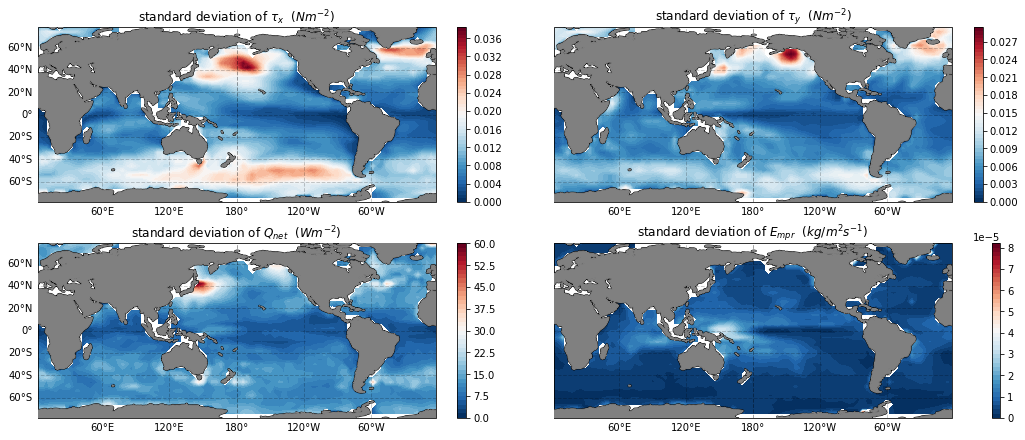

In [63]:
f, axes = plt.subplots(2, 2, figsize=(14.5,6),sharey=True, sharex=True,constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180),"aspect": 1})
for (img, ax) in zip([taux_std,tauy_std,qnet_std,empr_std],axes.flatten()):
    img.where(ds.hFacC[0]).plot.contourf(ax=ax,levels=50,cmap=plt.cm.RdBu_r,
                                                       transform=ccrs.PlateCarree(),add_colorbar=True, add_labels=False,cbar_kwargs=dict(orientation='vertical'))
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if ax == axes[0,0] or ax == axes[1,0]:
        gl.left_labels = True
    
axes[0, 0].set_title('standard deviation of $\\tau_x $  $(N m^{-2})$')
axes[0, 1].set_title('standard deviation of $\\tau_y$  $(N m^{-2})$')
axes[1, 0].set_title('standard deviation of $Q_{net}$  $(W m^{-2})$')
axes[1, 1].set_title('standard deviation of $E_{mpr}$  $(kg/m^2s^{-1})$')
#plt.savefig('Results_snap/std.png', bbox_inches='tight')

In [19]:
time = pd.date_range("2000-01-15", periods=600, freq='M')
taux = xr.DataArray(data=varnmall[0],dims=[ "time","YC","XG"],coords=dict(XG=ds.XG.values,YC=ds.YC.values,time=time))
tauv = xr.DataArray(data=varnmall[1],dims=[ "time","YG","XC"],coords=dict(YG=ds.YG.values,XC=ds.XC.values,time=time))
hfl = xr.DataArray(data=varnmall[2],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))
sfl = xr.DataArray(data=varnmall[3],dims=[ "time","YC","XC"],coords=dict(XC=ds.XC.values,YC=ds.YC.values,time=time))*1000
taux_std=filt_lowpass(taux, 1, 1/18, 5, 0, detrend=True, standard=True)
tauy_std=filt_lowpass(tauv, 1, 1/18, 5, 0, detrend=True, standard=True)
qnet_std=filt_lowpass(hfl, 1, 1/18, 5, 0, detrend=True, standard=True)
empr_std=filt_lowpass(sfl, 1, 1/18, 5, 0, detrend=True, standard=True)

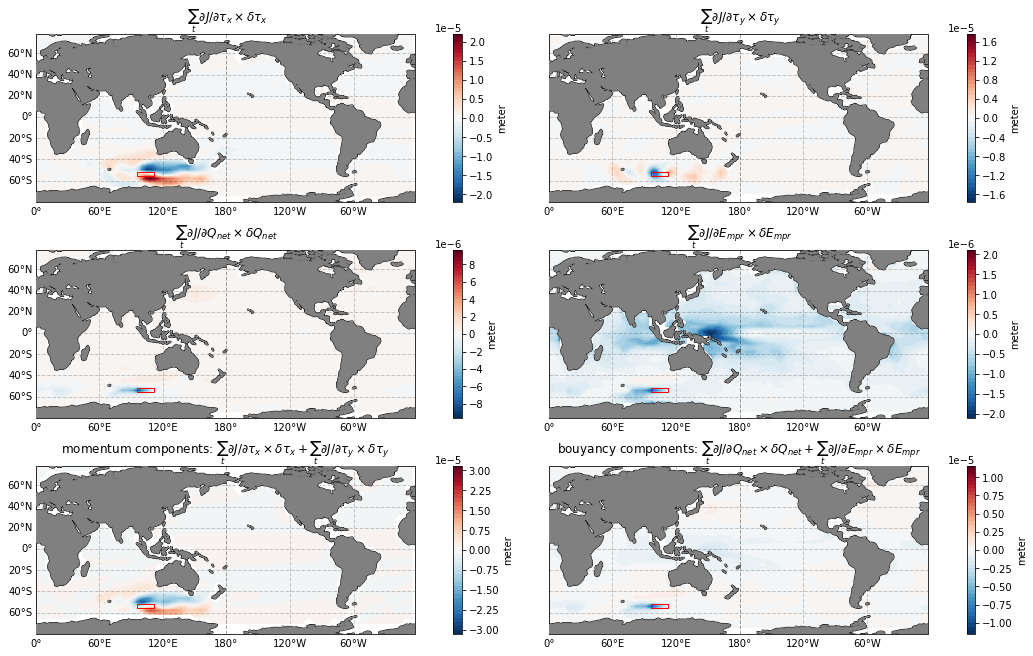

In [20]:
zwind=(ds.ADJtaux * taux_std).sum(dim='time').where(ADJtaux.hFacW[0])
mwind=(ds.ADJtauy * tauy_std).sum(dim='time').where(ADJtauy.hFacS[0])
heatf=(ds.ADJqnet * qnet_std).sum(dim='time').where(ADJqnet.hFacC[0])
freshf=(ds.ADJempr * empr_std).sum(dim='time').where(ds.hFacC[0])
momentum=zwind+mwind.values
bouyancy=heatf+freshf.values
titles = [r' $ \sum_t \partial {J}/ \partial{\tau}_x \times \delta\tau_x} $', r' $\sum_t \partial {J}/ \partial{\tau}_y\times \delta\tau_y}$',
         r' $\sum_t \partial {J}/ \partial{Q}_{net} \times \delta{Q}_{net} $', r' $\sum_t \partial {J}/ \partial{E}_{mpr}\times \delta{E}_{mpr}$',
         r'momentum components: $ \sum_t \partial {J}/ \partial{\tau}_x \times \delta\tau_x + \sum_t \partial {J}/ \partial{\tau}_y\times \delta\tau_y}$', 
          r'bouyancy components: $\sum_t \partial {J}/ \partial{Q}_{net} \times \delta{Q}_{net} + \sum_t \partial {J}/ \partial{E}_{mpr}\times \delta{E}_{mpr}$']
f, axes = plt.subplots(3, 2, figsize=(14.5,9),sharey=True, sharex=True,constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180),"aspect": 1})
for (img, ax,title) in zip([zwind,mwind,heatf,freshf,momentum,bouyancy],axes.flatten(),titles):
    img.plot.contourf(ax=ax,levels=50,cmap=plt.cm.RdBu_r,
                    transform=ccrs.PlateCarree(),add_colorbar=True,
                      add_labels=False,cbar_kwargs=dict(orientation='vertical',label='meter'))
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.set_title(title, fontsize=12)
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if ax == axes[0,0] or ax == axes[1,0] or ax == axes[2,0]:
        gl.left_labels = True

#plt.savefig('Results_snap/response_space.png', bbox_inches='tight')

Text(0.5, 1.0, 'm')

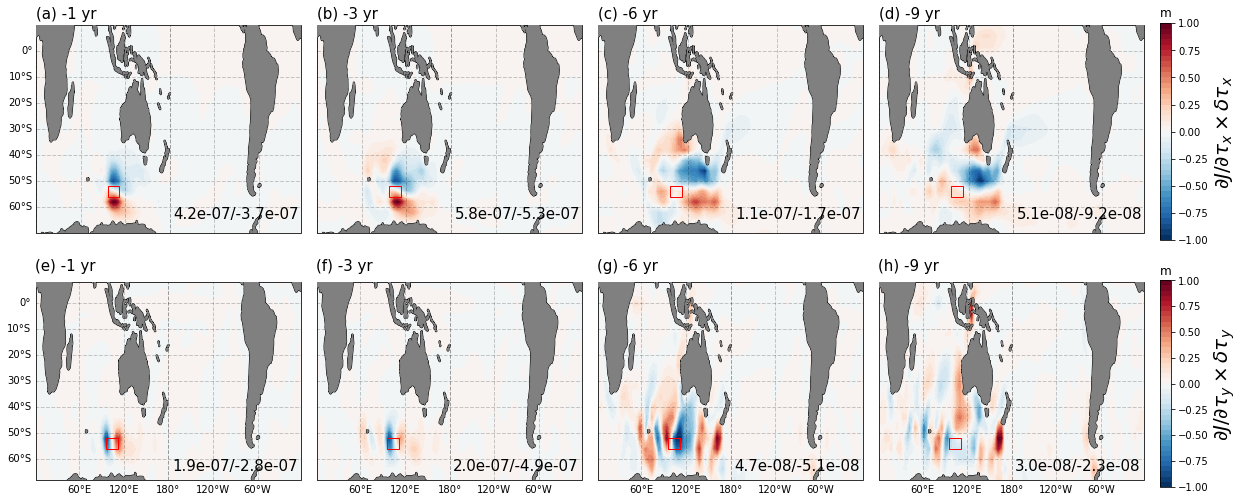

In [21]:
f, axes = plt.subplots(2, 4, figsize=(16, 7),constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 3.5})#, constrained_layout=True#, gridspec_kw = {'wspace':0.2, 'hspace':0.007}
taux_lag0 = (ds.ADJtaux[-12,:,:]*taux_std).sel(YC=slice(-70,10))#/ds.rAw  # YC XG
taux_lag1=(ds.ADJtaux[-36,:,:]*taux_std).sel(YC=slice(-70,10))
taux_lag2=(ds.ADJtaux[-72,:,:]*taux_std).sel(YC=slice(-70,10))
taux_lag3=(ds.ADJtaux[-108,:,:]*taux_std).sel(YC=slice(-70,10))

tauy_lag0 = (ds.ADJtauy[-12,:,:]*tauy_std).sel(YG=slice(-70,10))
tauy_lag1=(ds.ADJtauy[-36,:,:]*tauy_std).sel(YG=slice(-70,10))
tauy_lag2=(ds.ADJtauy[-72,:,:]*tauy_std).sel(YG=slice(-70,10))
tauy_lag3=(ds.ADJtauy[-108,:,:]*tauy_std).sel(YG=slice(-70,10))

data=[taux_lag0,taux_lag1,taux_lag2,taux_lag3,
      tauy_lag0,tauy_lag1,tauy_lag2,tauy_lag3]

labels = ["(a) -1 yr ", "(b) -3 yr ", "(c) -6 yr ","(d) -9 yr",
         "(e) -1 yr ", "(f) -3 yr ", "(g) -6 yr", "(h) -9 yr"]

for i, (img, ax, label) in enumerate(zip(data,axes.flatten(),labels)):
    cs=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False,cmap=plt.cm.RdBu_r,
                #vmin=-4e-6,vmax=4e-6,
                extend='neither',robust=False)
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.text(-180, 17, label, fontsize=15, va='top',ma='left')
    ax.text(5, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    #gl.ylocator = mticker.FixedLocator(np.arange(-80,80,10))
    #gl.xlocator = mticker.FixedLocator(np.arange(-180, 180, 30))
    if i>3:
        gl.bottom_labels = True
    if i == 0 or i == 4:
        gl.left_labels = True

cbar_ax1 = f.add_axes([1.003, 0.53, 0.01, 0.43])
cbar_ax2 = f.add_axes([1.003, 0.04, 0.01, 0.41])
# Draw the colorbar
cbar1=f.colorbar(cs, cax=cbar_ax1,orientation='vertical',extend='neither')
cbar2=f.colorbar(cs, cax=cbar_ax2,orientation='vertical',extend='neither')
cbar1.set_label(label=r"$\partial {J}/ \partial{\tau}_x \times \delta\tau_x$",size=20, weight='bold')
cbar2.set_label(label=r"$\partial {J}/ \partial{\tau}_y \times \delta\tau_y$",size=20, weight='bold')
cbar1.ax.tick_params(axis="both")
cbar2.ax.tick_params(axis="both")
cbar_ax1.set_title('m')
cbar_ax2.set_title('m')

#plt.savefig('Results_snap/mom_response.png', bbox_inches='tight')

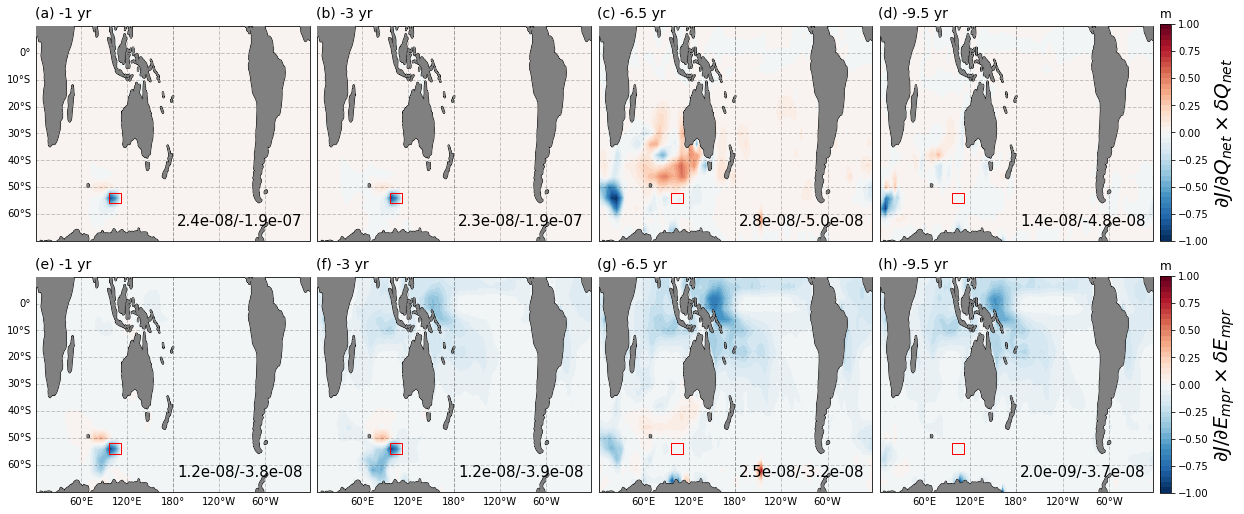

In [44]:
f, axes = plt.subplots(2, 4, figsize=(16, 7),constrained_layout=True,subplot_kw={'projection': ccrs.PlateCarree(180), "aspect": 3.5})#, constrained_layout=True#, gridspec_kw = {'wspace':0.2, 'hspace':0.007}
qnet_lag0 = ds.ADJqnet[-12,:,:]*qnet_std
qnet_lag1=ds.ADJqnet[-36,:,:]*qnet_std
qnet_lag2=ds.ADJqnet[-78,:,:]*qnet_std
qnet_lag3=ds.ADJqnet[-110,:,:]*qnet_std

empr_lag0 = ds.ADJempr[-12,:,:]*empr_std
empr_lag1=ds.ADJempr[-36,:,:]*empr_std
empr_lag2=ds.ADJempr[-78,:,:]*empr_std
empr_lag3=ds.ADJempr[-110,:,:]*empr_std

data1=[qnet_lag0.sel(YC=slice(-70,10)),qnet_lag1.sel(YC=slice(-70,10)),qnet_lag2.sel(YC=slice(-70,10)),qnet_lag3.sel(YC=slice(-70,10))]
data2=[empr_lag0.sel(YC=slice(-70,10)),empr_lag1.sel(YC=slice(-70,10)),empr_lag2.sel(YC=slice(-70,10)),empr_lag3.sel(YC=slice(-70,10))]

labels = ["(a) -1 yr ", "(b) -3 yr ", "(c) -6.5 yr ","(d) -9.5 yr",
         "(e) -1 yr ", "(f) -3 yr ", "(g) -6.5 yr", "(h) -9.5 yr"]

for i, (img, ax,label) in enumerate(zip(data1,axes.flatten()[0:4],labels[0:4])):
    cs1=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50,transform=ccrs.PlateCarree(), 
                                                    add_colorbar=False, add_labels=True,cmap=plt.cm.RdBu_r)
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.text(-180, 17, label, fontsize=14, va='top',ma='left') 
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.set_title('')
    ax.text(5, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    if i == 0:
        gl.left_labels = True
        
for i, (img, ax,label) in enumerate(zip(data2,axes.flatten()[4:],labels[4:])):
    cs2=(img/(abs(img).values.max())).plot.contourf(ax=ax,levels=50, transform=ccrs.PlateCarree(),
                                                    add_colorbar=False, add_labels=True,cmap=plt.cm.RdBu_r)
    ax.add_feature(cfeature.LAND,zorder=3,facecolor='gray')
    ax.add_feature(cfeature.COASTLINE, linestyle='-',lw=2)
    ax.text(-180, 17, label, fontsize=14, va='top',ma='left') 
    ax.add_patch(mpatches.Rectangle(xy=[96, -56], transform=ccrs.PlateCarree(),width=16, height=4,
                                facecolor='None', edgecolor='red',alpha=1))
    ax.set_title('')
    ax.text(5, -60, "{:.1e}/{:.1e}".format(img.max().values,img.min().values), fontsize=15, va='top',ma='right', color = 'k')
    gl=ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.2, linestyle="--")
    gl.bottom_labels = True
    if i == 0:
        gl.left_labels = True


cbar_ax1 = f.add_axes([1.003, 0.532, 0.01, 0.43])
cbar_ax2 = f.add_axes([1.003, 0.032, 0.01, 0.43])
# Draw the colorbar
cbar1=f.colorbar(cs, cax=cbar_ax1,orientation='vertical',extend='neither')
cbar2=f.colorbar(cs, cax=cbar_ax2,orientation='vertical',extend='neither')
cbar1.set_label(label=r"$\partial {J}/ \partial{Q}_{net} \times \delta{Q}_{net}$",size=20, weight='bold')
cbar2.set_label(label=r"$\partial {J}/ \partial{E}_{mpr}\times \delta{E}_{mpr}$",size=20, weight='bold')
cbar1.ax.tick_params(axis="both")
cbar2.ax.tick_params(axis="both")
cbar_ax1.set_title('m')
cbar_ax2.set_title('m')
#cbar_ax1.text(0, 1.00000095,"$m/(Nm^{-2})$", fontsize=15)
#cbar_ax2.text(-2, 4,r'$m/(Nm^{-2})$', fontsize=15)
#plt.savefig('Results_snap/buoy_response.png', bbox_inches='tight')

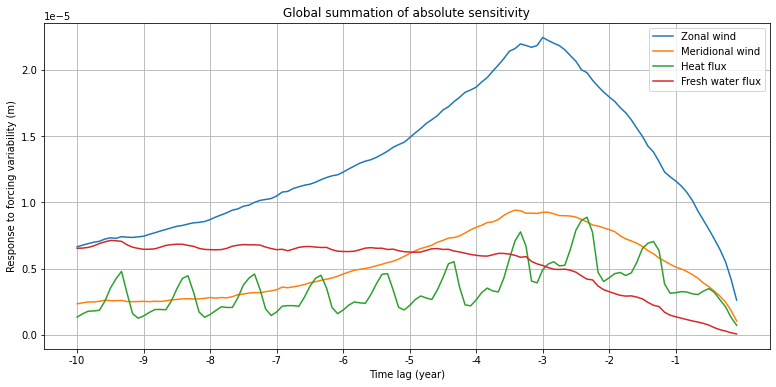

In [94]:
fig, ax = plt.subplots(figsize=(13,6))
ax.grid()
(np.fabs(ds.ADJtaux * taux_std)).sum(dim=['YC','XG'])[::-1].load().plot(ax=ax,label='Zonal wind')
(np.fabs(ds.ADJtauy * tauy_std)).sum(dim=['YG','XC'])[::-1].load().plot(ax=ax,label='Meridional wind')
(np.fabs(ds.ADJqnet * qnet_std)).sum(dim=['YC','XC'])[::-1].load().plot(ax=ax,label='Heat flux')
(np.fabs(ds.ADJempr * empr_std)).sum(dim=['YC','XC'])[::-1].load().plot(ax=ax,label='Fresh water flux')
plt.legend()

ax.set_xticks(ds.ADJtaux.time.data.astype('float64')[::12])
xlabel=(ds.ADJtaux.time.data.astype('float64')-36000000000000)/60000000000/12
ax.set_xticklabels(np.arange(1,11)-11)#xlabel[::12]
plt.xlabel("Time lag (year)")
plt.ylabel("Response to forcing variability (m)")
plt.title("Global summation of absolute sensitivity")
plt.savefig('Results_snap/timeseries.png', bbox_inches='tight')

In [24]:
# dJ var
J_taux=(np.fabs(ds.ADJtaux * taux_std)).mean(dim=['YC','XG']).sum(dim='time').values
J_tauy=(np.fabs(ds.ADJtauy * tauy_std)).mean(dim=['YG','XC']).sum(dim='time').values
J_qnet=(np.fabs(ds.ADJqnet * qnet_std)).mean(dim=['YC','XC']).sum(dim='time').values
J_empr=(np.fabs(ds.ADJempr * empr_std)).mean(dim=['YC','XC']).sum(dim='time').values
J_tot=J_taux+J_tauy+J_qnet+J_empr
for i in (J_taux,J_tauy,J_qnet,J_empr):
    print("{0:.0%}".format(i/J_tot))

48%
19%
13%
20%


In [46]:
# dJ mean
J_taux=np.fabs((ds.ADJtaux * taux_std).mean(dim=['YC','XG'])).sum(dim='time').values
J_tauy=np.fabs((ds.ADJtauy * tauy_std).mean(dim=['YG','XC'])).sum(dim='time').values
J_qnet=np.fabs((ds.ADJqnet * qnet_std).mean(dim=['YC','XC'])).sum(dim='time').values
J_empr=np.fabs((ds.ADJempr * empr_std).mean(dim=['YC','XC'])).sum(dim='time').values
J_tot=J_taux+J_tauy+J_qnet+J_empr
for i in (J_taux,J_tauy,J_qnet,J_empr):
    print("{0:.0%}".format(i/J_tot))

17%
4%
14%
65%


In [25]:
#sum=(np.fabs(ds.ADJtaux * taux_std)).sum(dim=['YC','XG'])+(np.fabs(ds.ADJtauy * tauy_std)).sum(dim=['YG','XC'])+(np.fabs(ds.ADJqnet * qnet_std)).sum(dim=['YC','XC'])+(np.fabs(ds.ADJempr * empr_std)).sum(dim=['YC','XC'])
#sum.plot()

In [26]:
#reconsj_all = np.zeros((4, 120))
#reconsj = np.zeros((120))

In [27]:
#ADJ=[ADJtaux.ADJtaux.data,ADJtauy.ADJtauy.data,ADJqnet.ADJqnet.data,ADJempr.ADJempr.data]

In [28]:
#varnmall = ['trenberth_taux_10y','trenberth_tauy_10y','ncep_qnet_10y', 'ncep_emp_10y'] 
#forc_dir='/work/uo0122/u301673/MITgcm_thesis/verification/g4/exp0/'
#for i,varnm in enumerate(varnmall):
#    filein=forc_dir+varnm+'.bin'
#    raw = np.fromfile(filein, dtype='>f')
#    varnmall[i]=np.reshape(raw, (120,40,90))
#    forc[i]=varnmall[i]-np.mean(varnmall[i],axis=0)
#    adxx=ADJ[i]
#    for irec in range (120):
#        reconsj_all[i,irec]=np.sum(forc[i][0:irec+1,:]*adxx[120-(irec+1)-36:120,:])
#        #total reconstructed ssh
#    reconsj[irec]=reconsj[irec]+reconsj_all[i,irec]
#    
#plt.figure(figsize=(12,8))
#plt.plot(xlabel,reconsj)
#plt.ylabel('reconstructed monthly ssh (m)')
#plt.xlabel('time')
#plt.grid()
#plt.show()
